# La prédiction avec la Régression linéaire 

## 1. Importation des librairies necessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importation des modeles
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


## 2. Importation des données

In [3]:
df_train = pd.read_csv('train_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

## 3. Determination de la corrélation

In [27]:
len(df_test.columns)

12

In [4]:
target = df_train['Price']
features = df_train.drop('Price', axis =1)
features['Target'] = target

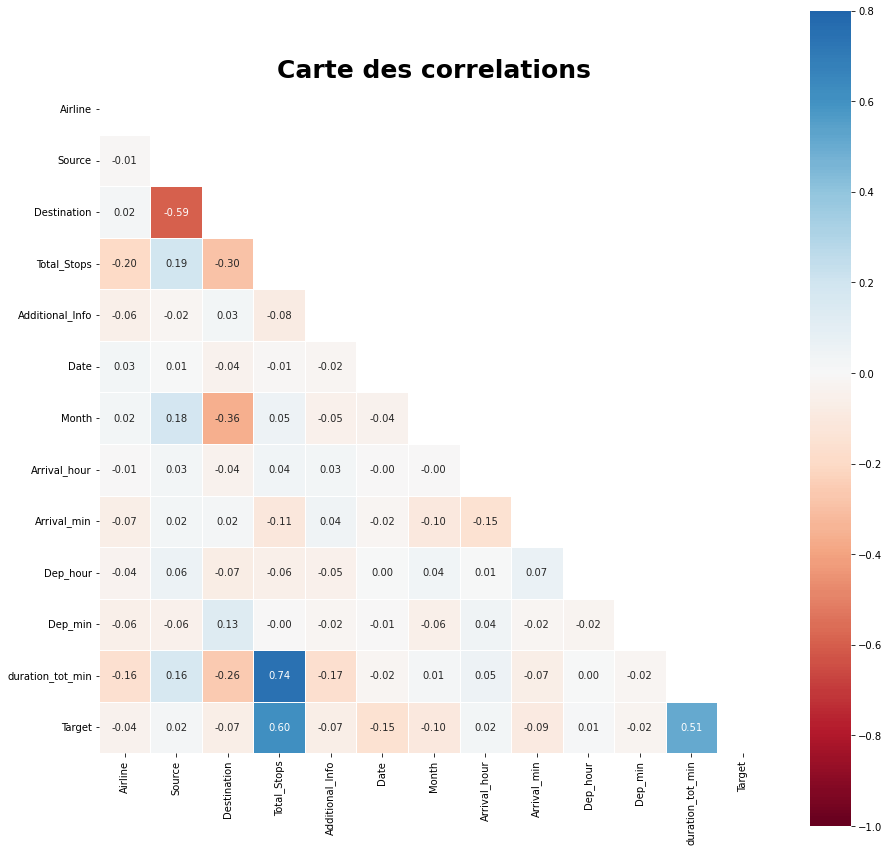

In [5]:
cor = features.corr()
mask = np.triu(np.ones_like(cor, dtype = bool)) # pour masquer la 2ème partie du tableau
plt.figure(figsize=(15,15))
sns.heatmap(cor, mask=mask, center= 0, cmap= 'RdBu', linewidths=1, square =True, annot=True, fmt= ".2f", vmin=-1, vmax=0.8)
plt.title('Carte des correlations', fontsize =25, fontweight= "bold")
plt.show()

## 4. Prétraitement des données

In [6]:
X = df_train.drop(['Price'], axis=1)
y = df_train['Price']

# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Instancier les différents modèles de prédiction

    Linear Regression    Ridge Regression    Lasso Regression    Elastic Net Regression

    Support Vector Regression    Decision Tree Regression    Random Forest Regression

In [7]:
models = [
            LinearRegression(),
            Ridge(),
            Lasso(),
            ElasticNet(),  
            SVR(), 
            DecisionTreeRegressor(), 
            RandomForestRegressor(),
            XGBRegressor()
        ]
        
model_names = ["Linear Regression", 'Ridge','Lasso', "ElasticNet",
             "Support Vector Regression", "Decision Tree", "Random Forest", "XGBRegressor"]

results = {'Model': [], 'R²': [], 'MAE': []}

## 6. Entrainement & evaluation des modèles

### a. Sur les données pures sans transformation

In [8]:
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    results['Model'].append(name)
    results['R²'].append(round(score,5))
    results['MAE'].append(round(mae,5))
    
results_df_1 = pd.DataFrame(results)
results_df_1

,Model,R²,MAE
0,Linear Regression,0.42375,2502.90715
1,Ridge,0.42374,2502.90519
2,Lasso,0.42370,2502.77674
3,ElasticNet,0.33803,2701.67346
4,Support Vector Regression,0.13965,3126.95976
5,Decision Tree,0.80584,745.10989
6,Random Forest,0.84924,692.25711
7,XGBRegressor,0.87671,785.71460


### b. Avec les données scalarisées

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    results['Model'].append(name)
    results['R²'].append(round(score,5))
    results['MAE'].append(round(mae,5))
    
results_df_2 = pd.DataFrame(results)
results_df_2

,Model,R²,MAE
0,Linear Regression,0.42375,2502.90715
1,Ridge,0.42374,2502.90519
2,Lasso,0.42370,2502.77674
3,ElasticNet,0.33803,2701.67346
4,Support Vector Regression,0.13965,3126.95976
5,Decision Tree,0.80584,745.10989
6,Random Forest,0.84924,692.25711
7,XGBRegressor,0.87671,785.71460
8,Linear Regression,0.42375,2502.90715
9,Ridge,0.42375,2502.90108


### c. Données avec applications de one hot encoder

In [11]:
# Application sur les données catégorielles
df_train = pd.get_dummies(df_train, columns = ['Airline','Destination','Additional_Info','Source','Total_Stops'])

X = df_train.drop(['Price'], axis=1)
y = df_train['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    results['Model'].append(name)
    results['R²'].append(round(score,5))
    results['MAE'].append(round(mae,5))
    
results_df_3 = pd.DataFrame(results)
results_df_3

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.029e+07, tolerance: 1.786e+07
  model = cd_fast.enet_coordinate_descent(


,Model,R²,MAE
0,Linear Regression,0.42375,2502.90715
1,Ridge,0.42374,2502.90519
2,Lasso,0.42370,2502.77674
3,ElasticNet,0.33803,2701.67346
4,Support Vector Regression,0.13965,3126.95976
5,Decision Tree,0.80584,745.10989
6,Random Forest,0.84924,692.25711
7,XGBRegressor,0.87671,785.71460
8,Linear Regression,0.42375,2502.90715
9,Ridge,0.42375,2502.90108


### Observation
Je constate que les modèles  {Decision Tree, Random Forest, XGBRegressor} ont une précision moyennement bonne comparer aux autres.   
Je vais continuer avec ses 3 en essayant de les optimiser.

## 6. Optimisation du modèle

In [13]:
models = [  DecisionTreeRegressor(criterion='absolute_error',
                                 min_samples_split = 3), 
            RandomForestRegressor(n_estimators=150,
                                  criterion='absolute_error',
                                  bootstrap = False,
                                  random_state = 42,
                                  warm_start = True),
            XGBRegressor(n_estimators=150,
                        )
        ]
model_names = ["Decision Tree", "Random Forest", "XGBRegressor"]

In [14]:
results = {'Model': [], 'R²': [], 'MAE': []}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    results['Model'].append(name)
    results['R²'].append(score)
    results['MAE'].append(mae)
    
results_df = pd.DataFrame(results)
results_df

,Model,R²,MAE
0,Decision Tree,0.844643,757.714787
1,Random Forest,0.849689,748.523277
2,XGBRegressor,0.896283,725.880935


In [15]:
results_df

,Model,R²,MAE
0,Decision Tree,0.844643,757.714787
1,Random Forest,0.849689,748.523277
2,XGBRegressor,0.896283,725.880935


In [16]:
test_data = pd.DataFrame({"Prix réel": y_test, "Prix prédict": y_pred.flatten()})
test_data.head()

,Prix réel,Prix prédict
4830,10413.0,10232.240234
3771,4030.0,4420.304199
1523,5963.0,6691.082520
3393,6860.0,7965.693359
4169,14571.0,14638.583008


array([[<AxesSubplot:title={'center':'Prix réel'}>,
        <AxesSubplot:title={'center':'Prix prédict'}>]], dtype=object)

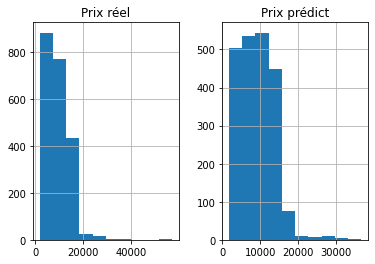

In [29]:
test_data.hist()

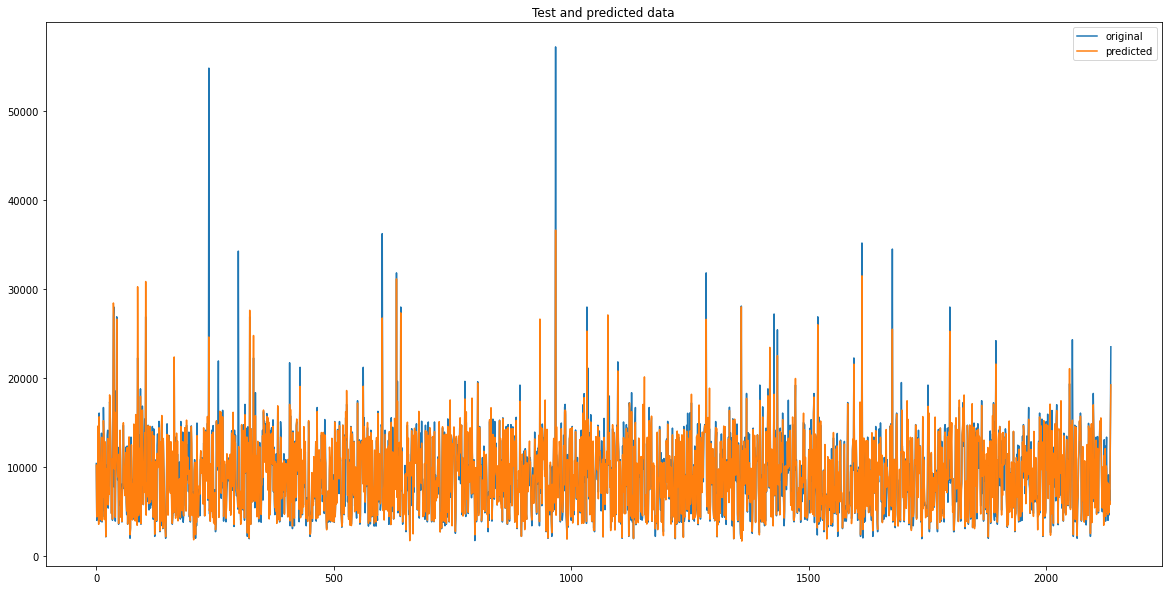

In [20]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")

plt.title("Test and predicted data")

plt.legend()
plt.show()

In [21]:
df_test_norm = pd.get_dummies(df_test, columns = ['Airline','Destination','Additional_Info','Source','Total_Stops'])

In [25]:
len(df_test_norm.columns) , len(X_train.columns)

(40, 45)

In [32]:
df_test_norm.columns, X_train.columns

(Index(['Date', 'Month', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
        'duration_tot_min', 'Airline_0', 'Airline_1', 'Airline_2', 'Airline_3',
        'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7', 'Airline_8',
        'Airline_10', 'Airline_11', 'Destination_0', 'Destination_1',
        'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
        'Additional_Info_0', 'Additional_Info_3', 'Additional_Info_4',
        'Additional_Info_5', 'Additional_Info_7', 'Additional_Info_8',
        'Source_0', 'Source_1', 'Source_2', 'Source_3', 'Source_4',
        'Total_Stops_0.0', 'Total_Stops_1.0', 'Total_Stops_2.0',
        'Total_Stops_3.0', 'Total_Stops_4.0'],
       dtype='object'),
 Index(['Date', 'Month', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
        'duration_tot_min', 'Airline_0', 'Airline_1', 'Airline_2', 'Airline_3',
        'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7', 'Airline_8',
        'Airline_9', 'Airline_10', 'Airline_

In [34]:
pred = model.predict(df_test)

ValueError: Feature shape mismatch, expected: 45, got 12